In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing the dataset

from sklearn import datasets, metrics
data = datasets.load_breast_cancer()


In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# Matrix of features

x = pd.DataFrame(data = data.data, columns = data.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Selecting Dependent variable

y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
x.shape, y.shape

((569, 30), (569,))

In [8]:
# Spliting the dataset in train and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size = 0.2,
                                                  random_state = 0)

In [9]:
x_train.shape, y_train.shape

((455, 30), (455,))

In [10]:
x_test.shape, y_test.shape

((114, 30), (114,))

In [11]:
# Feature Scalling

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [12]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [13]:
x_test

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [14]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [15]:
x_train = x_train.reshape(455, 30, 1)
x_test = x_test.reshape(114, 30, 1)

In [16]:
x_train.shape, x_test.shape

((455, 30, 1), (114, 30, 1))

## Building a Model


In [17]:
model = tf.keras.models.Sequential()


In [18]:
# Adding First CNN layer

model.add(tf.keras.layers.Conv1D(filters = 32, 
                                kernel_size = 2,
                                activation = 'relu',
                                input_shape = [30,1]))
# batch Normalization - allows each layer of network to learn by itself a bit more independent

model.add(tf.keras.layers.BatchNormalization())


# dropout layer

model.add(tf.keras.layers.Dropout(0.2))



In [19]:
# Second CNN layer

model.add(tf.keras.layers.Conv1D(filters = 64,
                                kernel_size = 2,
                                activation ='relu'))

model.add(tf.keras.layers.BatchNormalization())
          
model.add(tf.keras.layers.Dropout(0.4))

In [20]:
# Add Flatten Layer

model.add(tf.keras.layers.Flatten())

In [21]:
# Dense layer (fully connected layer)

model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

# output layer

model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [23]:
# Compiling the model

opt = tf.keras.optimizers.Adam(learning_rate = 0.00005)

model.compile(optimizer = opt, 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs = 111, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/111
15/15 [==============================] - 1s 27ms/step - loss: 0.7018 - accuracy: 0.6264 - val_loss: 0.6227 - val_accuracy: 0.8772
Epoch 2/111
15/15 [==============================] - 0s 8ms/step - loss: 0.3773 - accuracy: 0.8659 - val_loss: 0.5667 - val_accuracy: 0.8684
Epoch 3/111
15/15 [==============================] - 0s 8ms/step - loss: 0.2474 - accuracy: 0.8945 - val_loss: 0.5237 - val_accuracy: 0.8333
Epoch 4/111
15/15 [==============================] - 0s 9ms/step - loss: 0.2175 - accuracy: 0.9077 - val_loss: 0.4912 - val_accuracy: 0.8070
Epoch 5/111
15/15 [==============================] - 0s 9ms/step - loss: 0.1723 - accuracy: 0.9297 - val_loss: 0.4682 - val_accuracy: 0.7895
Epoch 6/111
15/15 [==============================] - 0s 9ms/step - loss: 0.1620 - accuracy: 0.9407 - val_loss: 0.4500 - val_accuracy: 0.7632
Epoch 7/111
15/15 [==============================] - 0s 9ms/step - loss: 0.1559 - accuracy: 0.9385 - val_loss: 0.4353 - val_accuracy: 0.7632
Epoch 8/111


Epoch 59/111
15/15 [==============================] - 0s 9ms/step - loss: 0.0415 - accuracy: 0.9802 - val_loss: 0.0773 - val_accuracy: 0.9649
Epoch 60/111
15/15 [==============================] - 0s 8ms/step - loss: 0.0556 - accuracy: 0.9802 - val_loss: 0.0817 - val_accuracy: 0.9649
Epoch 61/111
15/15 [==============================] - 0s 8ms/step - loss: 0.0352 - accuracy: 0.9868 - val_loss: 0.0813 - val_accuracy: 0.9649
Epoch 62/111
15/15 [==============================] - 0s 9ms/step - loss: 0.0686 - accuracy: 0.9736 - val_loss: 0.0840 - val_accuracy: 0.9649
Epoch 63/111
15/15 [==============================] - 0s 9ms/step - loss: 0.0506 - accuracy: 0.9736 - val_loss: 0.0841 - val_accuracy: 0.9649
Epoch 64/111
15/15 [==============================] - 0s 9ms/step - loss: 0.0751 - accuracy: 0.9670 - val_loss: 0.0844 - val_accuracy: 0.9649
Epoch 65/111
15/15 [==============================] - 0s 8ms/step - loss: 0.0482 - accuracy: 0.9780 - val_loss: 0.0842 - val_accuracy: 0.9649
Epoch 

## Model Prediction and Evaluation


In [25]:
# model 
y_pred = model.predict(x_test)
y_pred = np.round(y_pred).astype(int)

In [26]:
y_pred[0], y_test[0]

(array([0]), 0)

In [27]:
y_pred [46], y_test[46]

(array([1]), 1)

In [28]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
cm

Confusion Matrix: 


array([[44,  3],
       [ 1, 66]], dtype=int64)

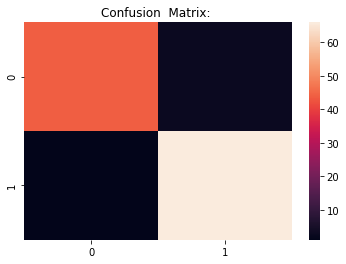

In [31]:
sns.heatmap(data = cm)
plt.title('Confusion  Matrix: ');

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', accuracy * 100 ,'%')

Accuracy Score:  96.49122807017544 %


In [33]:
def learning_curve(history, epoch):

  # Training Vs Accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend('Train','Validation', loc = 'upper left')
  



In [34]:
def loss_curve(history, epoch):
    
  # Training Vs Validation Loss
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend('Train','Validation', loc = 'upper left')

In [37]:
import warnings
warnings.filterwarnings('ignore')

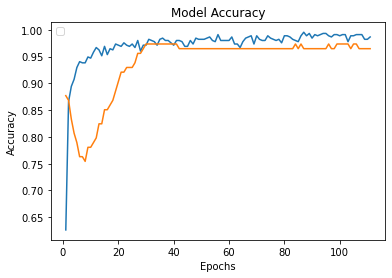

In [38]:
learning_curve(history, epoch = 111)

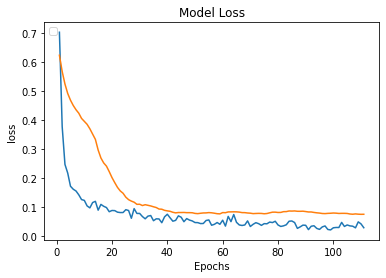

In [39]:
loss_curve(history, epoch = 111)